# Laboratorio 6 - Modsim
### Parte 1
Cree un programa en Python (o en el lenguaje de su preferencia) para modelar la distribución de temperatura dentro
de una varilla sólida. Utilice modelado secuencial multiescala, donde combina un modelo macroscópico y un
modelo microscópico. Suponga que la varilla consta de dos materiales diferentes con diferentes conductividades
térmicas. Considere los siguientes pasos propuestos
1. Cree una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo macroscópico.
2. Cree una función que calcule la distribución de temperatura dentro de la varilla a lo largo del tiempo utilizando un modelo microscópico.
3. Combine ambos modelos para implementar un enfoque de modelado secuencial de múltiples escalas, donde el modelo macroscópico proporciona condiciones de contorno para el modelo microscópico.
4. Simule y visualice la distribución de temperatura dentro de la varilla durante un período de tiempo determinado.

### Simulacion Macroscopica
Se utilizo la sigueinte funcion para la dispersion del calor
$$P = d_{Q}* d_{t} = k*A * \frac{T_{h} − T_{c}}{d}

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def macroscopico(temperaturas, conductividad_material, num_puntos):
    A = 2
    nuevas_temperaturas = np.copy(temperaturas)
    for i in range(1, num_puntos - 1):
        k = conductividad_material
        nueva_temp = k * A * (temperaturas[i + 1] + temperaturas[i] + temperaturas[i - 1]) / 3
        nuevas_temperaturas[i] = nueva_temp
    return nuevas_temperaturas

def plot_macro(longitud_varilla, num_puntos, temps, scale, iteracion, path="./E1_images/macro/step_"):
    plt.plot(np.linspace(0, longitud_varilla, num_puntos), temps)
    plt.ylim(0, scale)
    plt.xlabel('Posición en la varilla')
    plt.ylabel('Temperatura')
    plt.title(('Simulacion Macroscopica:' if path =="./E1_images/macro/step_" else 'Simulacion Multiescala:') + f' {iteracion + 1}')
    image_name = path + f'{iteracion}.jpg'
    plt.savefig(image_name)
    plt.close()
    return image_name

### Simulacion Microscopica

Se utilizo la conductividad de cada particula para la simulacion de la transmision de calor en las particulas

In [55]:

def microscopic(temperaturas, conductividad_particula, delta_tiempo):
    nuevas_temperaturas = np.copy(temperaturas)
    for i in range(1, len(temperaturas) - 1):
        flujo_calor = conductividad_particula * (temperaturas[i + 1] - temperaturas[i] + temperaturas[i - 1])
        nuevas_temperaturas[i] += flujo_calor * delta_tiempo
    return nuevas_temperaturas

def plot_micro(num_particulas, temps, scale, iteracion):
    plt.plot(range(num_particulas), temps)
    plt.ylim(0, scale)
    plt.xlabel('Partícula')
    plt.ylabel('Temperatura')
    plt.title(f'Simulacion Microscopica: step f{iteracion + 1}')
    image_name = f"./E1_images/micro/step_{iteracion}.jpg"
    plt.savefig(image_name)
    plt.close()
    return image_name

### Simulacion

In [60]:
import random

# Parámetros del modelo microscópico
num_particulas = 100  # Número de partículas
conductividad_particula = 0.1  # Conductividad térmica de cada partícula
tiempo_total = 5.0  # Tiempo total de simulación
num_pasos_tiempo = 500  # Número de pasos de tiempo
delta_tiempo = tiempo_total / num_pasos_tiempo

# Parámetros de la varilla
longitud_varilla = 10.0  # Longitud de la varilla en unidades arbitrarias
num_puntos = 10  # Número de puntos en la discretización espacial
conductividad_material = 1.0

# Parámetros de la simulación
tiempo_total = 5.0  # Tiempo total de simulación
num_pasos_tiempo = 100  # Número de pasos de tiempo
delta_tiempo = tiempo_total / num_pasos_tiempo
delta_x = longitud_varilla / (num_puntos - 1)

# Inicializar temperaturas
temperaturas = np.zeros(num_puntos)

# Definir condiciones iniciales y de contorno
temperaturas[0] = 0.0  # Temperatura en el extremo izquierdo
temperaturas[-1] = 20  # Temperatura en el extremo derecho
scale = max(temperaturas)

# Definir condiciones iniciales y de contorno
temperaturas[0] = 0.0  # Temperatura en el extremo izquierdo
temperaturas[-1] = 20  # Temperatura en el extremo derecho
delta_tiempo = tiempo_total / num_pasos_tiempo
delta_x = longitud_varilla / (num_puntos - 1)

iteraciones = []
micro_list_images = []
macro_list_images = []
list_images = []

for paso_tiempo in range(num_pasos_tiempo):
    # Simulacion Macroscopica
    temperaturas_macro = macroscopico(temperaturas, conductividad_material, num_puntos)
    image_name = plot_macro(longitud_varilla, num_puntos, temperaturas_macro, scale, paso_tiempo)
    macro_list_images.append(image_name)

    # Simulacion Microscopica

    # Discretizacion de las 10 particulas por punto
    temperaturas_micro = []
    [[temperaturas_micro.append(temp) for _ in range(10)] for temp in temperaturas]
    for i, temp in enumerate(temperaturas_micro):
        choice = random.randint(0, 2)
        if choice == 1:
            continue

        if choice == 2 and temp <= 0:
            continue

        temperaturas_micro[i] = temp + (0.02 if choice == 0 else -0.05)

    # Simulacion
    temperaturas_micro = microscopic(temperaturas_micro, conductividad_particula, delta_tiempo)
    image_name = plot_micro(num_particulas, temperaturas_micro, scale, paso_tiempo)
    micro_list_images.append(image_name)
    
    # Combinacion de simulaciones
    for i in range(len(temperaturas)):
        micro_i = sum([temperaturas_micro[i*10 + j] for j in range(10)]) / 10
        temperaturas[i] = (micro_i + temperaturas_macro[i]) / 2

    temperaturas = [
        (temperaturas_micro[i] + temperaturas_macro[i]) / 2
        for i in range(len(temperaturas))
    ]
    image_name = plot_macro(longitud_varilla, num_puntos, temperaturas, scale, paso_tiempo, path='./E1_images/combined/step_')
    list_images.append(image_name)

### Render de Resultados

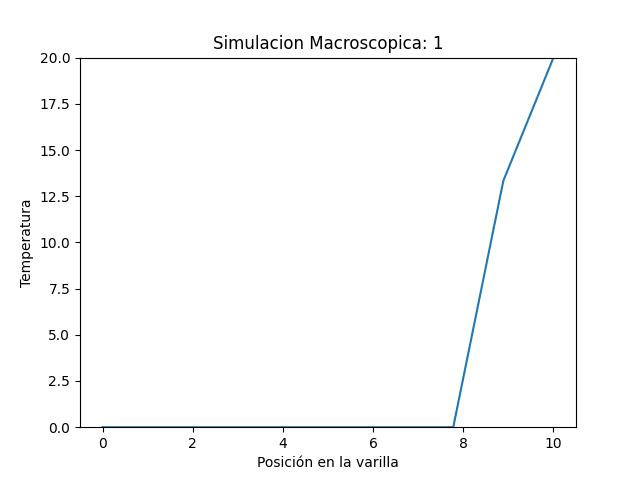

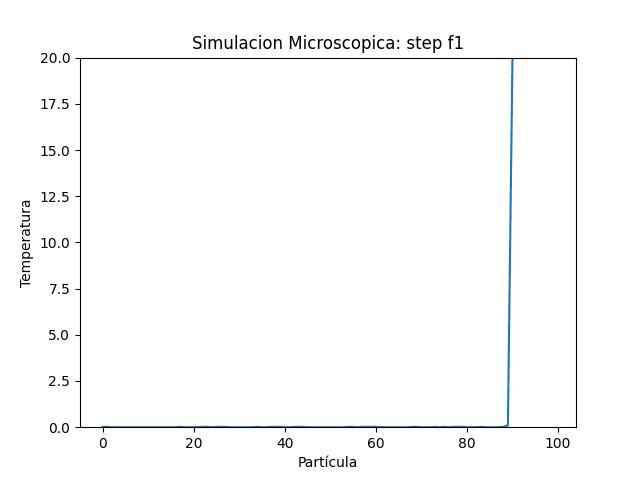

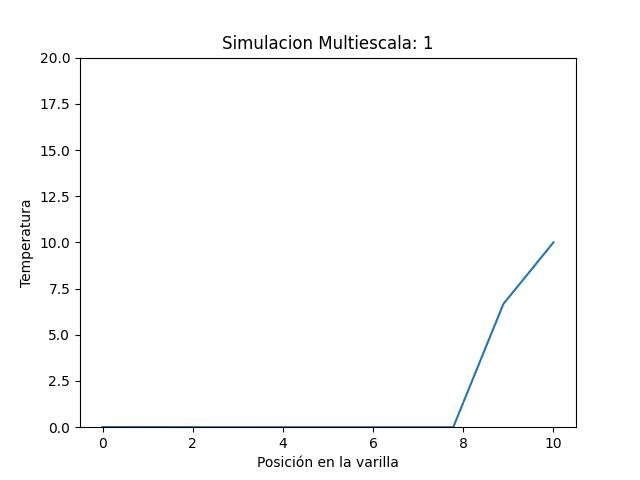

In [61]:
from IPython.display import display, Image as IPImage
from PIL import Image

# Macro
images = [Image.open(path) for path in macro_list_images]
gif_path = "Temp-Macro.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=150)
display(IPImage(filename=gif_path))

# Micro
images = [Image.open(path) for path in micro_list_images]
gif_path = "Temp-Micro.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=150)
display(IPImage(filename=gif_path))

# Combined
images = [Image.open(path) for path in list_images]
gif_path = "Temp-Combined.gif"
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=150)
display(IPImage(filename=gif_path))

**Responda:**
- a. ¿En qué se diferencia el modelo macroscópico del modelo microscópico en este escenario?
  El modelo macroscopico simula la varilla utilizando la dispoerción de calor en el aire tomando parametros iniciales de la varilla.
  Por otro lado, el modelo microscopico simula la disperción de calor de las partículas de la varilla haciendo un supuesto de densidad de particulas y tomando como temperatura inicial la temperatura de la varilla del modelo macroscopico.
  
- b. ¿Cuáles son las condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico?
  Las condiciones de entorno estan dados por la temperatura de la varilla en los diferentes puntos. En este caso se discretizaron 10 puntos a nivel macro que luego se convierten en 10 particulas cada uno a nivel micro.
  
- c. ¿Cómo adaptaría este modelo multiescala si la varilla estuviera compuesta por más de dos materiales diferentes?
  Definiria la conductividad de cada material y haria un mapa en donde definiría la parte de la varilla con el material y su conductividad termica. Estos mismos parametros funcionarían para la simulación macroscopica y micrsocopica.